<h1>Regresión Lineal 2</h1>

A01639224 | Fausto Alejandro Palma Cervantes

TC3006C.102 | Inteligencia artificial avanzada para la ciencia de datos I

4 de septiembre de 2023


## Librerías y módulos necesarios

In [2]:
# Importar librerías y módulos
import pandas as pd # Descarga la base de datos titulada "breast_cancer" disponible en canvas.
import numpy as np # Mostrar que las variables regresoras son independientes.
from sklearn.preprocessing import StandardScaler # Mostrar que las variables regresoras son independientes.
from sklearn.model_selection import train_test_split # Utiliza un modelo de regresión lineal múltiple para predecir el radio del tumor.
import statsmodels.formula.api as smf # Utiliza un modelo de regresión lineal múltiple para predecir el radio del tumor.
from scipy import stats # Hipótesis nula de los coeficientes de regresión.
import matplotlib.pyplot as plt # Hipótesis nula de los coeficientes de regresión.
import statsmodels.api as sm # Comparación entre datos reales y predicción.

## Descarga la base de datos titulada "breast_cancer" disponible en canvas.

Dicha base de datos contiene información sobre las características de diversos tumores.



In [3]:
# Lectura de la base de datos
bc_df = pd.read_csv('/content/drive/MyDrive/z. Estadística/breast_cancer.csv')

# Excluir 'id' como variable predictora
bc_df.drop('id', axis=1, inplace=True)

# Incluir 'diagnosis' como variable predictora
dummies = pd.get_dummies(bc_df['diagnosis'], prefix='diagnosis')
bc_df = pd.concat([bc_df, dummies], axis=1)
bc_df.drop('diagnosis', axis=1, inplace=True)

# Renombrar variables para la regresión
bc_df.rename(columns={'concave points_mean':'concave_points_mean'}, inplace=True)
bc_df.rename(columns={'concave points_se':'concave_points_se'}, inplace=True)
bc_df.rename(columns={'concave points_worst':'concave_points_worst'}, inplace=True)

# Imprimir primeras 5 filas
bc_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


## 1. Base de datos completa.

No se observan valores faltantes. En caso de haberlos se realiza imputación simple.


In [4]:
# Imprimir base de datos
bc_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,1


In [5]:
# Imprimir valores faltantes por columna
print(bc_df.isnull().sum())

# Imprimir valores faltantes en total
print('Total de valores faltantes:', bc_df.isnull().sum().sum())

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis_B                0
diagnosis_M                0
dtype: int64
Total de valores faltantes: 0


## 2. Mostrar que las variables regresoras son independientes.

En caso de no serlo realizar el procedimiento correspondiente.


In [6]:
# Ver si existen variables con alta correlación
correlacion = bc_df.corr()
alta_corr = np.where((correlacion > 0.95) & (correlacion < 1))
alta_corr

(array([ 0,  0,  0,  0,  2,  2,  2,  2,  3,  3,  3,  3,  3, 10, 10, 12, 13,
        20, 20, 20, 20, 20, 22, 22, 22, 22, 22, 23, 23, 23]),
 array([ 2,  3, 20, 22,  0,  3, 20, 22,  0,  2, 20, 22, 23, 12, 13, 10, 10,
         0,  2,  3, 22, 23,  0,  2,  3, 20, 23,  3, 20, 22]))

In [7]:
# Estandarizar los datos
scaler = StandardScaler()
bc_df_standard = scaler.fit_transform(bc_df)
bc_df_standard = pd.DataFrame(bc_df_standard, columns=bc_df.columns)
bc_df_standard

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,-1.297676,1.297676
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,-1.297676,1.297676
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,-1.297676,1.297676
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,-1.297676,1.297676
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,-1.297676,1.297676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,-1.297676,1.297676
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,-1.297676,1.297676
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,-1.297676,1.297676
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,-1.297676,1.297676


## Utiliza un modelo de regresión lineal múltiple para predecir el radio del tumor.

Las variables regresoras de tu modelo deben de ser todas las variables de la base de datos.

In [8]:
# Dividir los datos en conjuntos de entrenamiento y prueba
entrenamiento, prueba = train_test_split(bc_df_standard, test_size=0.20, random_state=42)

# Modelo inicial
modelo = smf.ols(formula='''radius_mean ~ texture_mean + perimeter_mean + area_mean
                            + smoothness_mean + compactness_mean + concavity_mean
                            + concave_points_mean + symmetry_mean + fractal_dimension_mean
                            + radius_se + texture_se + perimeter_se + area_se + smoothness_se
                            + compactness_se + concavity_se + concave_points_se + symmetry_se
                            + fractal_dimension_se + radius_worst + texture_worst
                            + perimeter_worst + area_worst + smoothness_worst
                            + compactness_worst + concavity_worst + concave_points_worst
                            + symmetry_worst + fractal_dimension_worst + diagnosis_B
                            + diagnosis_M''', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.787e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:40:26   Log-Likelihood:                 1245.2
No. Observations:                 455   AIC:                            -2428.
Df Residuals:                     424   BIC:                            -2301.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

## 3. Hipótesis nula de los coeficientes de regresión.

Estadístico de prueba, distribución del estadístico de prueba. Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.

Pese a que el resumen de resultados de la regresión linear anterior muestra el estadístico t y el p-valor, se llevó a cabo una prueba t de hipotesis nula para cada uno de los coeficientes de la regresión. Ya que se busca un nivel de confianza de 95%, un p-valor menor a 0.05 quiere decir que la variable predictora afecta significativamente a la variable de resupuesta (se rechaza la hipótesis nula) y por lo tanto, no puede excluirse del modelo. Para calcular y graficar los valores críticos del conjunto de datos posteriormente se usó el mismo número de grados de libertad calculado por la función 't_test()'.

In [9]:
# Crear Data Frame para almacenar los resultados de las pruebas
pt_df = pd.DataFrame(columns=['H0', 'Estadístico T', 'P-Valor', 'Rechazo de H0'])

# Prueba de hipótesis nula para T de Student
for i in bc_df.columns[1:]:
  h_0 = i + ' = 0'
  prueba_t = modelo.t_test(h_0)
  pt_df.loc[len(pt_df.index)] = [h_0, np.round(prueba_t.tvalue[0][0], 4), np.round(prueba_t.pvalue, 4), True if prueba_t.pvalue < 0.05 else False]

# Imprimir Data Frame
pt_df

,H0,Estadístico T,P-Valor,Rechazo de H0
0,texture_mean = 0,-0.5775,0.5639,False
1,perimeter_mean = 0,51.5944,0.0000,True
2,area_mean = 0,5.6111,0.0000,True
3,smoothness_mean = 0,2.9744,0.0031,True
4,compactness_mean = 0,-12.0612,0.0000,True
5,concavity_mean = 0,-5.4046,0.0000,True
6,concave_points_mean = 0,-0.2598,0.7951,False
7,symmetry_mean = 0,2.1624,0.0311,True
8,fractal_dimension_mean = 0,2.6730,0.0078,True
9,radius_se = 0,1.1366,0.2563,False


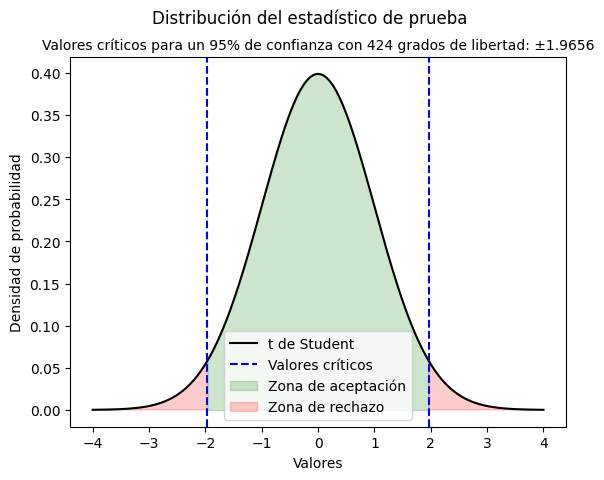

In [10]:
# Definir grados de libertad
dof = prueba_t.df_denom # Observaciones - Coeficientes

# Generar y graficar distribución T de Student
x = np.linspace(-4, 4, 1000)
pdf_t = stats.t.pdf(x, df=dof)
plt.plot(x, pdf_t, label='t de Student', color='black')

# Calcular y graficar valores críticos para un 95% de confianza
alpha = 0.05
cv = stats.t.ppf(1 - alpha / 2, df=dof)
plt.axvline(cv, color='blue', linestyle='dashed', label='Valores críticos')
plt.axvline(-cv, color='blue', linestyle='dashed')

# Graficar zonas de aceptación y rechazo (de la hipótesis nula)
plt.fill_between(x, 0, pdf_t, where=(x < cv) & (x > -cv), label='Zona de aceptación', color='green', alpha=0.2)
plt.fill_between(x, 0, pdf_t, where=(x > cv) | (x < -cv), label='Zona de rechazo', color='red', alpha=0.2)

# Añadir título, subtítulo, etiquetas y leyenda
plt.suptitle('Distribución del estadístico de prueba')
plt.title(f'Valores críticos para un {round((1-alpha)*100)}% de confianza con {round(dof)} grados de libertad: ±{cv:.4f}', fontsize=10)
plt.xlabel('Valores')
plt.ylabel('Densidad de probabilidad')
plt.legend()

## 4. Hipótesis nula de la significancia del modelo (prueba F-Fisher).
Menciona que distribución tiene el estadístico de prueba con qué número de grados de libertad. Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.

Similar al problema anterior, se llevó a cabo una prueba F para evaluar la significancia estadística del modelo y se utilizó el mismo razonamiento para determinar si las variables predictoras afectan significativamente a la variable de resupuesta. Para calcular y graficar los valores críticos se utilizaron los mismos grados de libertad para el numerador y denominador que calcula la función 'f_test()'.

In [11]:
# Generar hipótesis nula
h_0 = '''texture_mean = perimeter_mean = area_mean
         = smoothness_mean = compactness_mean = concavity_mean
         = concave_points_mean = symmetry_mean = fractal_dimension_mean
         = radius_se = texture_se = perimeter_se = area_se = smoothness_se
         = compactness_se = concavity_se = concave_points_se = symmetry_se
         = fractal_dimension_se = radius_worst = texture_worst
         = perimeter_worst = area_worst = smoothness_worst
         = compactness_worst = concavity_worst = concave_points_worst
         = symmetry_worst = fractal_dimension_worst = diagnosis_B
         = diagnosis_M = 0'''

# Prueba F-Fisher para calcular la significancia del modelo
prueba_f = modelo.f_test(h_0)

# Crear Data Frame para almacenar los resultados de la prueba
pf_df = pd.DataFrame(columns=['H0', 'Estadístico F', 'P-Valor', 'Rechazo de H0'])
pf_df.loc[len(pf_df.index)] = [h_0, round(prueba_f.fvalue, 4), np.round(prueba_f.pvalue, 4), True if prueba_f.pvalue < 0.05 else False]

# Imprimir Data Frame
pf_df

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 31, but rank is 30
  warnings.warn('covariance of constraints does not have full '


,H0,Estadístico F,P-Valor,Rechazo de H0
0,texture_mean = perimeter_mean = area_mean\n ...,57867.7864,0.0,True


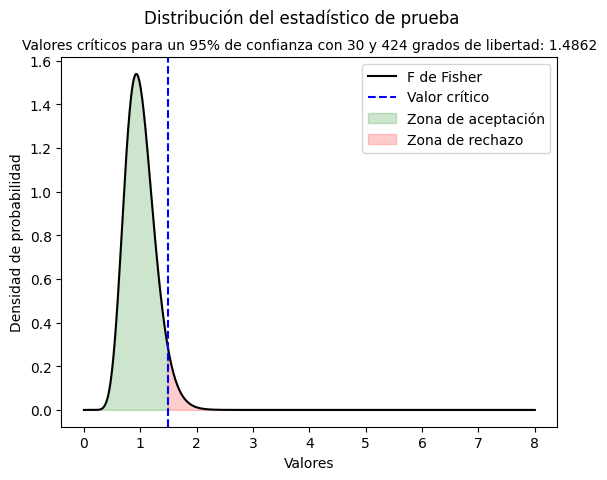

In [12]:
# Definir grados de libertad (numerador y denominador)
dof_n = prueba_f.df_num # Coeficientes - 1
dof_d = prueba_f.df_denom # Observaciones - Coeficientes

# Generar y graficar distribución F de Fisher
x = np.linspace(0, 8, 1000)
pdf_f = stats.f.pdf(x, dof_n, dof_d)
plt.plot(x, pdf_f, label='F de Fisher', color='black')

# Calcular y graficar valores críticos para un 95% de confianza
cv = stats.f.ppf(0.95, dof_n, dof_d)
plt.axvline(cv, color='blue', linestyle='dashed', label='Valor crítico')

# Graficar zonas de aceptación y rechazo
plt.fill_between(x, 0, pdf_f, where=(x < cv), label='Zona de aceptación', color='green', alpha=0.2)
plt.fill_between(x, 0, pdf_f, where=(x > cv), label='Zona de rechazo', color='red', alpha=0.2)

# Añadir título, subtítulo, etiquetas y leyenda
plt.suptitle('Distribución del estadístico de prueba')
plt.title(f'Valores críticos para un {round((1-alpha)*100)}% de confianza con {round(dof_n)} y {round(dof_d)} grados de libertad: {cv:.4f}',
          fontsize=10)
plt.xlabel('Valores')
plt.ylabel('Densidad de probabilidad')
plt.legend()

## 5. Realiza un modelo de regresión hacia atrás (backward).

Explica el criterio para ir eliminando variables del modelo.


Considerando que los resultados de la regresión lineal con OLS muestran el p-valor de cada variable predictora y ya que este ayuda a demostrar si cada una es estadísticamente importante, el criterio para eliminar variables del modelo fue que tuvieran un p-valor mayor o igual a 0.05. Este proceso se hizo quitando una variable a la vez hasta que se consiguió un modelo que cumpliera con los criterios, siempre seleccionando la variable con el p-valor más alto. El modelo final tiene únicamente dieciocho variables predictoras y, por su p-valor, no tiene una constante.


In [13]:
# Modelo final
modelo = smf.ols(formula='''radius_mean ~ perimeter_mean + area_mean + smoothness_mean
                            + compactness_mean + concavity_mean + symmetry_mean
                            + fractal_dimension_mean + perimeter_se + concavity_se
                            + concave_points_se + symmetry_se + fractal_dimension_se
                            + radius_worst + perimeter_worst + area_worst + smoothness_worst
                            + compactness_worst + symmetry_worst''', data=entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.709e+04
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        05:40:28   Log-Likelihood:                 1240.4
No. Observations:                 455   AIC:                            -2443.
Df Residuals:                     436   BIC:                            -2364.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

## 6. Comparación entre datos reales y predicción.

Análisis de los resultados.


In [14]:
# Predecir la variable de respuesta
y_aprox = 0 +0.9426*prueba['perimeter_mean'] +0.0773*prueba['area_mean'] +0.0072*prueba['smoothness_mean']
-0.0576*prueba['compactness_mean'] -0.0336*prueba['concavity_mean'] +0.0034*prueba['symmetry_mean']
+0.0059*prueba['fractal_dimension_mean'] -0.0126*prueba['perimeter_se'] +0.0118*prueba['concavity_se']
+0.0038*prueba['concave_points_se'] +0.0044*prueba['symmetry_se'] -0.0045*prueba['fractal_dimension_se']
+0.2381*prueba['radius_worst'] -0.1208*prueba['perimeter_worst'] -0.0819*prueba['area_worst']
-0.0833*prueba['area_worst'] -0.0048*prueba['smoothness_worst'] +0.0127*prueba['compactness_worst']
-0.0045*prueba['symmetry_worst']

# Comparar los datos reales y su predicción
tabla = pd.DataFrame({'Real':prueba['radius_mean'], 'Prediccion':y_aprox, 'Errores':prueba['radius_mean']-y_aprox})
tabla

,Real,Prediccion,Errores
204,-0.470694,-0.458734,-0.011960
70,1.366877,1.329340,0.037537
131,0.378508,0.405061,-0.026552
431,-0.490575,-0.444134,-0.046442
540,-0.734828,-0.726043,-0.008784
...,...,...,...
486,0.145616,0.084352,0.061265
75,0.551757,0.504391,0.047366
249,-0.740508,-0.754832,0.014324
238,0.026330,0.008503,0.017827


Text(0, 0.5, 'Prediccion')

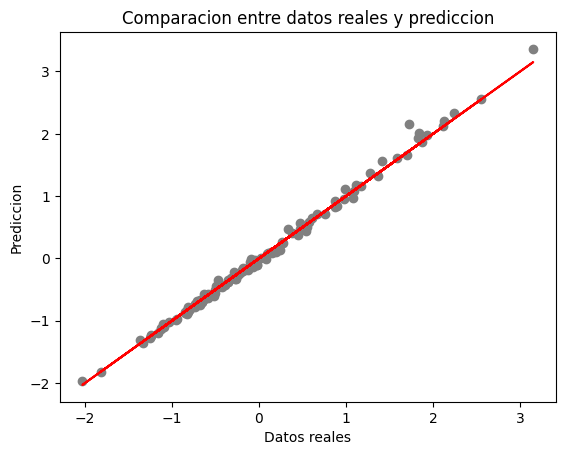

In [15]:
# Comparacion entre datos reales y su prediccion
plt.scatter(prueba['radius_mean'], y_aprox, color='gray')
plt.plot(prueba['radius_mean'], prueba['radius_mean'], color='red')
plt.title('Comparacion entre datos reales y prediccion')
plt.xlabel('Datos reales')
plt.ylabel('Prediccion')

Text(0, 0.5, 'Valor del residuo')

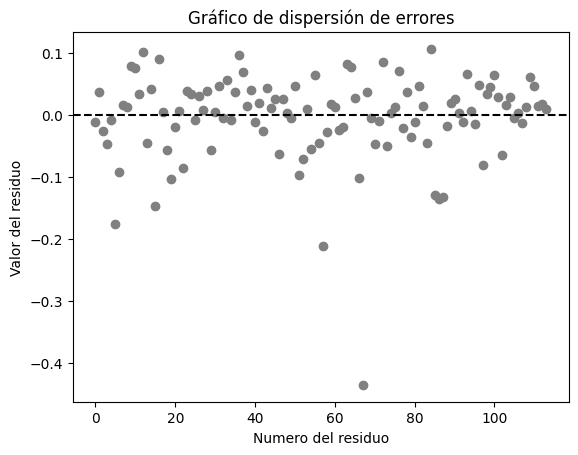

In [16]:
# Visualización de los residuos
l_residuos = len(tabla['Errores'])
plt.scatter(range(l_residuos), tabla['Errores'], color='gray')
plt.axhline(y=0, linestyle='--', color='black')
plt.title('Gráfico de dispersión de errores')
plt.xlabel('Numero del residuo')
plt.ylabel('Valor del residuo')

Text(0, 0.5, 'Frecuencia (proba)')

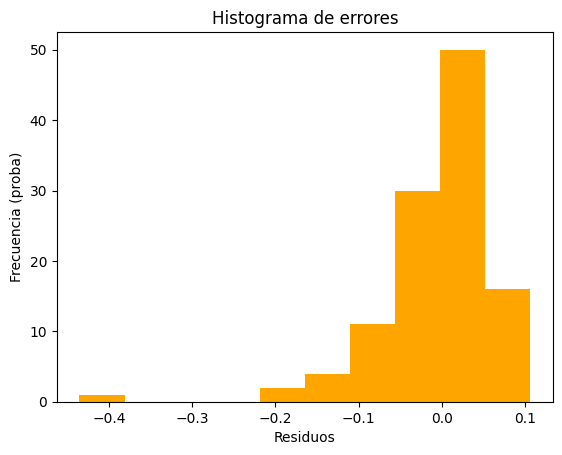

In [17]:
# Histograma de los residuos
plt.hist(x=tabla['Errores'], color='orange')
plt.title('Histograma de errores')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia (proba)')

Text(0.5, 1.0, 'Q-Q Plot de los errores estandarizados')

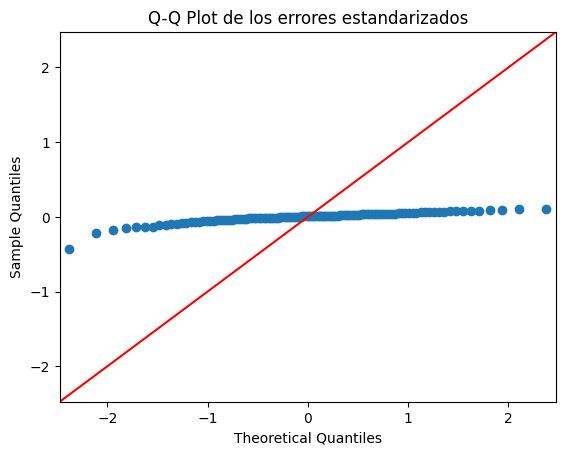

In [18]:
# Calcular los errores estandarizados
media = tabla['Errores'].mean()
std = tabla['Errores'].std()
Errores_est = (tabla['Errores'] - media) / std

# Realizar prueba Kolmogorov-Smirnov
stats.kstest(Errores_est, 'norm')

# Comparar la distribución de los errores contra una distribución normal.
QQ = sm.qqplot(tabla['Errores'], stats.norm, line='45')
plt.title('Q-Q Plot de los errores estandarizados')

Al hacer la comparación entre los datos reales y predicción se puede observar que las predicciones son casi iguales a los datos reales. El gráfico de dispersión y el histograma de errores ayudan a demostrar que la mayoría de los residuos son cercanos a 0 y que casi todos se encuentran entre ±0.01. Considerando todo lo anterior se puede concluir que modelo de regresión lineal múltiple generado puede predecir el radio del tumor con un muy alto grado de confianza.